In [1]:
import tensorflow as tf
import os

2023-08-11 23:13:46.071907: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 23:13:46.113842: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Limiting GPU Usage

In [2]:
# #Avoid OOM errors by setting GPU memory Consumption Growth
# # list all gpus in the system
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
# Hide GPU from visible devices
tf.config.set_visible_devices([], 'GPU')

2023-08-11 23:13:47.992313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-11 23:13:48.023442: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-11 23:13:48.023747: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Remove dodgy images:

In [4]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [5]:
image_dir = 'boat img data'

In [6]:
image_exists = ['jpeg','jpg','png','bmp']

In [7]:
for image_class in os.listdir(image_dir):
    for image in os.listdir(os.path.join(image_dir,image_class)):
        image_path =os.path.join(image_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exists:
                print('image not in exist list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            

In [8]:
#img = cv2.imread(os.path.join('boat img data','ship','ship_1.png'))

In [9]:
#img.shape

In [10]:
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

# load Data

In [11]:
#tf.data.Dataset.list_files()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('boat img data', shuffle=False)

Found 2000 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
data_iterator

In [16]:
# Getting another batch from the iterator
batch = data_iterator.next()

In [17]:
# length of batch is 2 batch[0] is the images and batch[1] is the labels
len(batch)

2

In [18]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [19]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

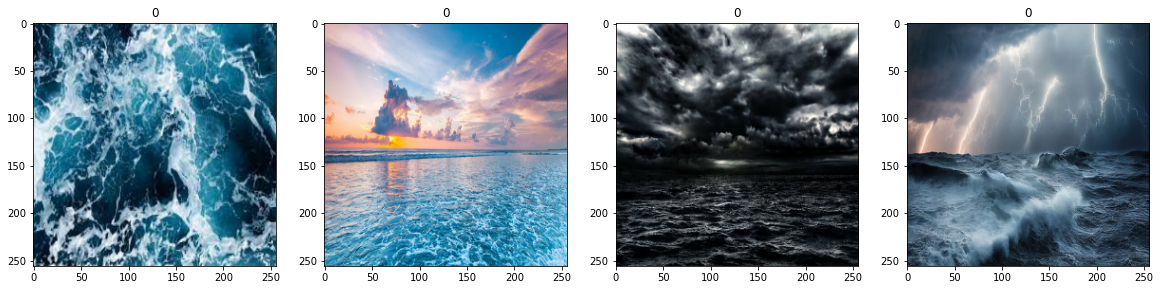

In [20]:
#checking labels for the classes 
fix, ax = plt.subplots(ncols=4 ,figsize=(20,20))
for idx, img  in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

0 is for Not ship images 1 for ship 

## Preprocessing 

In [21]:
data = data.map(lambda x,y: (x/255,y))

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

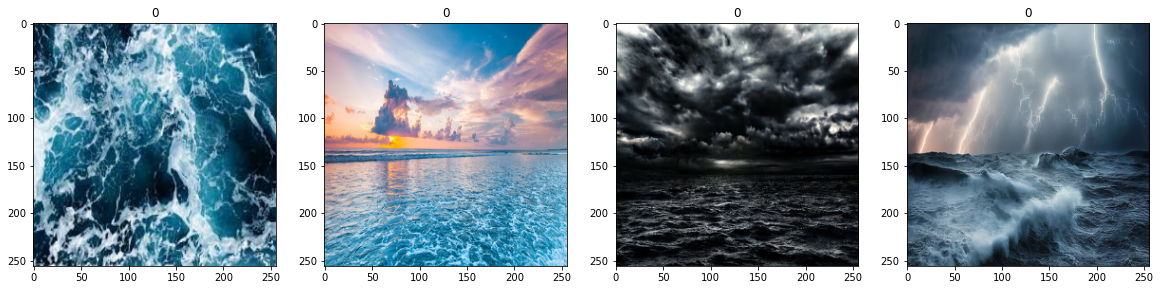

In [24]:
#checking labels for the classes 
fix, ax = plt.subplots(ncols=4 ,figsize=(20,20))
for idx, img  in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Zoom in/out by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using nearest neighbors
)

### Split Data

In [26]:
len(data)

63

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'data' contains your dataset
images = []
labels = []
for batch in data.as_numpy_iterator():
    batch_images, batch_labels = batch
    images.extend(batch_images)
    labels.extend(batch_labels)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the data and labels together using the same random permutation
permutation = np.random.permutation(len(images))
shuffled_images = images[permutation]
shuffled_labels = labels[permutation]

# Split the shuffled data into train, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(shuffled_images, shuffled_labels, test_size=0.3, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=1/3, random_state=42)

# Now 'train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', and 'test_labels' hold the shuffled data


In [28]:
train_images.shape



(1400, 256, 256, 3)

In [29]:
val_images.shape


(400, 256, 256, 3)

In [30]:

test_images.shape

(200, 256, 256, 3)

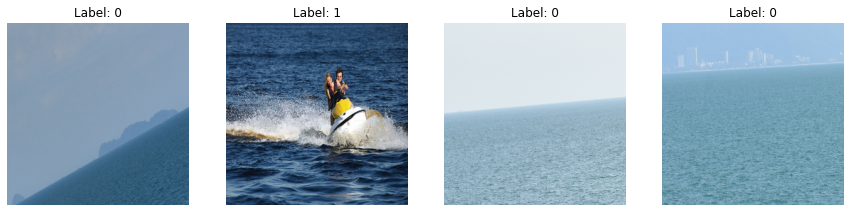

In [31]:
import matplotlib.pyplot as plt

# Assuming 'val_images' and 'val_labels' are your validation data
num_images_to_show = 4  # Change this to the number of images you want to display

# Randomly select 'num_images_to_show' indices from the validation set
indices_to_show = np.random.randint(0, len(val_images), num_images_to_show)

# Display the selected images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(val_images[idx])
    plt.title(f"Label: {val_labels[idx]}")
    plt.axis("off")
plt.show()


## Model 

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(Adam(learning_rate=0.0001), loss=tf.losses.BinaryCrossentropy(),  metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [37]:
logdir = 'logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [40]:
# Use the early stopping callback during training
history = model.fit(train_images, train_labels, epochs=100,
                    batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stopping])

Epoch 1/100
 1/44 [..............................] - ETA: 36s - loss: 5.7077 - accuracy: 0.6562

2023-08-11 23:14:23.409180: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff6bc0091b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-11 23:14:23.409232: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-08-11 23:14:23.429312: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-11 23:14:23.532550: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


44/44 [==============================] - 8s 170ms/step - loss: 4.4642 - accuracy: 0.7621 - val_loss: 3.3182 - val_accuracy: 0.8800
Epoch 2/100
44/44 [==============================] - 7s 166ms/step - loss: 2.6384 - accuracy: 0.8550 - val_loss: 2.0268 - val_accuracy: 0.8775
Epoch 3/100
44/44 [==============================] - 7s 170ms/step - loss: 1.6647 - accuracy: 0.8864 - val_loss: 1.3656 - val_accuracy: 0.9050
Epoch 4/100
44/44 [==============================] - 7s 167ms/step - loss: 1.1423 - accuracy: 0.9021 - val_loss: 0.9591 - val_accuracy: 0.9100
Epoch 5/100
44/44 [==============================] - 7s 165ms/step - loss: 0.8550 - accuracy: 0.9071 - val_loss: 0.7385 - val_accuracy: 0.9150
Epoch 6/100
44/44 [==============================] - 8s 175ms/step - loss: 0.6699 - accuracy: 0.9186 - val_loss: 0.6008 - val_accuracy: 0.9250
Epoch 7/100
44/44 [==============================] - 8s 172ms/step - loss: 0.5616 - accuracy: 0.9221 - val_loss: 0.5100 - val_accuracy: 0.9200
Epoch 8/100

In [41]:
history.history

{'loss': [4.46416711807251,
  2.6383824348449707,
  1.664676308631897,
  1.142302393913269,
  0.8550315499305725,
  0.6699259281158447,
  0.5616319179534912,
  0.47944048047065735,
  0.4269268810749054,
  0.387937068939209,
  0.33972951769828796,
  0.32544437050819397,
  0.29404494166374207,
  0.2709173262119293,
  0.26012399792671204,
  0.2586936056613922,
  0.23928672075271606,
  0.21890521049499512,
  0.19934086501598358,
  0.1976998895406723,
  0.1865037977695465,
  0.1797446608543396,
  0.1696714609861374,
  0.17439725995063782,
  0.16265830397605896,
  0.1512656807899475,
  0.15936434268951416,
  0.14562688767910004,
  0.15451814234256744,
  0.15773162245750427,
  0.1300983875989914,
  0.1338588446378708,
  0.12117855250835419,
  0.122569240629673,
  0.12223415821790695,
  0.12329430878162384,
  0.12859240174293518,
  0.12968066334724426,
  0.11318293958902359,
  0.11308550089597702,
  0.10596876591444016,
  0.11079474538564682,
  0.10815589129924774,
  0.10653045773506165,
  0.0

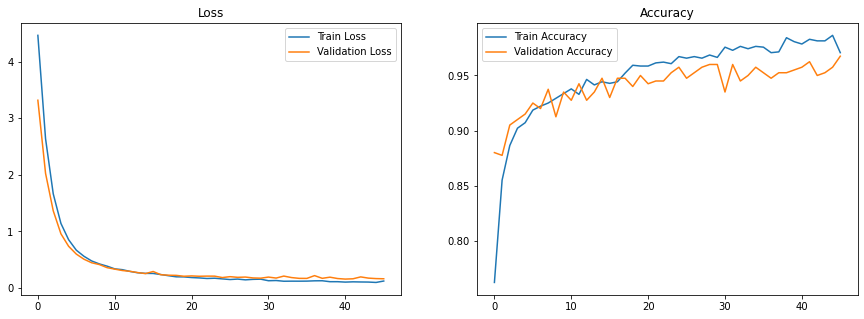

In [42]:
# Plot loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.legend()

plt.show()

## Evaluate Performance

### Evaluate

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [44]:
# Evaluate performance on the test set
y_pred = model.predict(test_images)
y_pred_binary = (y_pred > 0.5).astype(int)

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

pre.update_state(test_labels, y_pred_binary)
re.update_state(test_labels, y_pred_binary)
acc.update_state(test_labels, y_pred_binary)

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')


7/7 [==============================] - 0s 45ms/step
Precision: 0.9702970385551453, Recall: 0.9702970385551453, Accuracy: 0.9700000286102295


In [45]:
 from sklearn.metrics import classification_report, confusion_matrix
 #Generate classification report and confusion matrix
class_names = ['Not Ship', 'Ship']
report = classification_report(test_labels, y_pred_binary, target_names=class_names)
print(report)

cm = confusion_matrix(test_labels, y_pred_binary)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

    Not Ship       0.97      0.97      0.97        99
        Ship       0.97      0.97      0.97       101

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Confusion Matrix:
[[96  3]
 [ 3 98]]


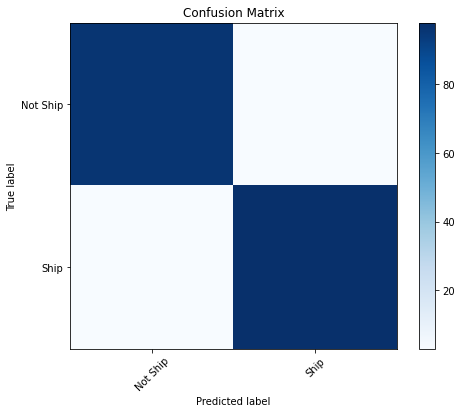

In [46]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Test on the new picture 

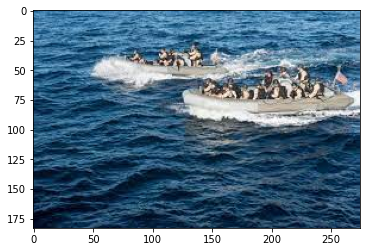

In [99]:
img = cv2.imread('testimg/tb7.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

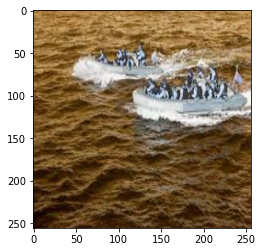

In [100]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[152.51758  , 105.51758  ,  43.51758  ],
        [142.0039   ,  95.00391  ,  33.003906 ],
        [159.66992  , 112.66992  ,  50.66992  ],
        ...,
        [164.51562  , 121.25781  ,  62.257812 ],
        [166.       , 122.       ,  61.222656 ],
        [165.03711  , 121.03711  ,  60.03711  ]],

       [[151.30934  , 104.30934  ,  42.309338 ],
        [137.99582  ,  90.99581  ,  28.995811 ],
        [145.33981  ,  98.33981  ,  36.33981  ],
        ...,
        [190.85773  , 147.59991  ,  88.7061   ],
        [193.53246  , 149.53246  ,  88.75511  ],
        [193.05688  , 149.05688  ,  88.056885 ]],

       [[159.9874   , 113.84873  ,  51.561623 ],
        [147.21785  , 101.07918  ,  38.79207  ],
        [145.02708  ,  98.88841  ,  36.601307 ],
        ...,
        [202.40688  , 159.14906  , 100.33461  ],
        [203.45631  , 159.45631  ,  99.18927  ],
        [203.37695  , 159.37695  ,  98.95117  ]],

       ...,

     

In [102]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [104]:
yhat

array([[0.9888452]], dtype=float32)

In [105]:
if yhat >0.5:
    print(f'Predicted class is ship')
else:
    print(f'Predicted class is not ship')

Predicted class is ship


 # Save Model


In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save(os.path.join('models','shipimageclassifierlive.h5'))

/usr/lib/python3/dist-packages/keras/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## loading

In [56]:
new_model = load_model(os.path.join('models','shipimageclassifierlive.h5'))

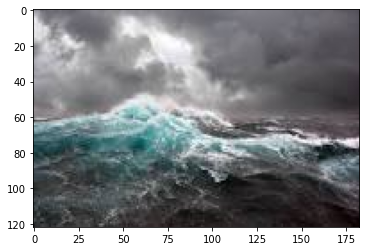

In [57]:
img = cv2.imread('testimg/ts1.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

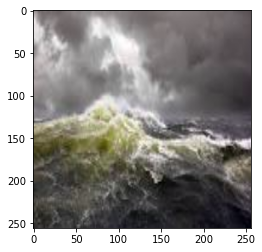

In [58]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
yhat_newmodel = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [60]:
yhat_newmodel

array([[0.4982161]], dtype=float32)

In [61]:
if yhat_newmodel >0.5:
    print(f'Predicted class is ship')
else:
    print(f'Predicted class is not ship')

Predicted class is not ship
